# Problem Statement :
This dataset contains various demographic and financial features that could be used to build a classification model for predicting loan approval or denial. The loan_status column serves as the target variable for the classification task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",font_scale=1.0)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .4)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv')

In [3]:
# Copy the original dataset to another object
df = data.copy()

Column Descriptions:
-----------------------------
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


In [4]:
# Show the first five rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Show the last five rows of the dataframe
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Show the dimension of the dataframe
print('The Shape of the Dataset is : ',df.shape)

The Shape of the Dataset is :  (614, 13)


- In the dataset there are only have 614 rows and 13 columns.

In [7]:
# Show the data types of the dataframe
print('The datatypes are : \n' + '*'*20)
print(df.dtypes)

The datatypes are : 
********************
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


- Here it shows the tree types of data i.e int, float and object.

In [8]:
# Show the columns
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
# To check the missing value
print('Total Missing Values are : \n' + '*'*25)
print(df.isnull().sum())

Total Missing Values are : 
*************************
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


- From the above observation there is some missing value present in our dataset.Now we handle the missing value using imputation.

In [10]:
# fill the missing value 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
# Again to check the missing value
print('Total Missing Values are : \n' + '*'*25)
print(df.isnull().sum())

Total Missing Values are : 
*************************
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


- After treat the missing value now there is no missing value present in our dataset.So we can for futher step.

In [12]:
# To check the duplicate value
print('Total Duplicate Values are : \n' + '*'*27)
print(df.duplicated().sum())

Total Duplicate Values are : 
***************************
0


- By observation there do not have any duplicated value in our dataset

In [13]:
# To check the unique value
print('The Unique Values are : \n' + '*'*25)
df.nunique().to_frame('No. of unique value')

The Unique Values are : 
*************************


,No. of unique value
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


- Here Loan_ID is a unique value and it is not associated with model build and prediction.Therefore we drop the unnecessary feature.

In [14]:
# drop Loan_ID feature
df.drop('Loan_ID', axis=1, inplace=True)

In [15]:
# Show the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- We observe the 'Dependent' column shows in dataset as discrete number but in summary the datatypes shows object,Therefore we need to change the datatypes. 

In [16]:
# first we remove the non numeric character
df['Dependents'] = df['Dependents'].str.replace('+', '', regex=False)

In [17]:
# change the data type
df['Dependents'] = df['Dependents'].astype(int)

In [18]:
# Again we check the data types of the 'Dependents'
print('The datatypes are : \n' + '*'*20)
print(df['Dependents'].dtypes)

The datatypes are : 
********************
int32


Now,
- In 'coapplicant income' column we observe that some of rows are contain with 0.0.
- Therefore, first we have replace the 0 value to NaN then second remove the NaN values.

In [19]:
# change the data types
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

In [20]:
# Replace 0.0 with NaN
df['CoapplicantIncome'].replace(0.0, pd.NA, inplace=True)

In [21]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,<NA>,146,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,<NA>,66,360.0,1,Urban,Y


In [22]:
# Replacing NaN with the mean
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

In [23]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,2919.190616,146,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,2919.190616,66,360.0,1,Urban,Y


In [24]:
# Here we change the format of Loan_Term in proper readble format in months.
df['Loan_Amount_Term'] = (df['Loan_Amount_Term'] / 10).astype(int)

In [25]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,2919.190616,146,36,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128,36,1,Rural,N


- Now my data is proper.

In [26]:
# Show the statistical summary of data
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,2919.190616,146.397394,34.190554,0.773616
std,1.009623,6109.041673,2540.710721,84.037503,6.458893,0.418832
min,0.000000,150.000000,16.000000,9.000000,1.000000,0.000000
25%,0.000000,2877.500000,2064.750000,100.250000,36.000000,1.000000
50%,0.000000,3812.500000,2919.190616,129.000000,36.000000,1.000000
75%,1.000000,5795.000000,2919.190616,164.750000,36.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,48.000000,1.000000


By observation,
  - the count of all numeric variable are same that means there is no missing value.
      - Mean value is greater than Median value in Dependents, ApplicantIncome, LoanAmount columns which indicates that the data is left skewed.
        - Mean value is less than Median value in Loan_Amount_Term and Credit_History columns which indicates that the data is possibly right skewed.
          - There are huge difference between 75% and max value in three columns it indicates that there may be outlier present.

In [27]:
# Show the size of the dataset
df.size

7368

In [28]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- In out dataset the target variable is Loan_Status which we have to predict.It shows the two types 'Yes' or 'No'.So, this is binary classification problem

# Data Extraction/Filtering

In [29]:
df['Gender'].value_counts()/len(df['Gender'])*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

- In analysis we observe 82% are the Male applicant and only few applicants are female which 18%.

In [30]:
df['Married'].value_counts()/len(df['Married'])*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

- In analysis we observe the 65% applicants are married in our dataset.

In [31]:
max(df['ApplicantIncome'])

81000

In [32]:
min(df['ApplicantIncome'])

150

In [33]:
filter_1 = df[(df['ApplicantIncome'] >= 40000) & (df['Gender'] == 'Male')]
filter_1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,Male,Yes,3,Graduate,No,51763,2919.190616,700,30,1,Urban,Y
333,Male,Yes,0,Graduate,No,63337,2919.190616,490,18,1,Urban,Y
409,Male,Yes,3,Graduate,No,81000,2919.190616,360,36,0,Rural,N


- In analysis we check the number of applicants for loan based on two conditions : the applicant's income must be greater than 40,000, and the applicant must be male.

In [34]:
filter_2 = df[(df['Gender']=='Male') & (df['Loan_Status']=='N')]
len(filter_2)

155

- From analysis we observe the total number of 155  male applicants did not approved for loan.

In [35]:
filter_3 = df[(df['Gender']=='Female') & (df['Loan_Status']=='N')]
len(filter_3)

37

- From analysis we observe the total number of 37 female applicants did not approved for loan.

In [36]:
filter_4 = df[(df['Married'] == 'Yes') & (df['Gender'] == 'Male') & (df['Loan_Status']=='Y') & (df['ApplicantIncome'] >= 40000)]
filter_4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,Male,Yes,3,Graduate,No,51763,2919.190616,700,30,1,Urban,Y
333,Male,Yes,0,Graduate,No,63337,2919.190616,490,18,1,Urban,Y


- From the analysis we observe only two married male are approved for the loan who's income must be greater than 40000.

In [37]:
filter_5 = df[(df['Married'] == 'Yes') & (df['Gender'] == 'Male') & (df['Loan_Status']=='N') & (df['ApplicantIncome'] > 40000)]
filter_5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3,Graduate,No,81000,2919.190616,360,36,0,Rural,N


- By analysis we observe only one married male applicant does not approved for the loan who's income also 81000.I think it because of his credit history is not good.

In [38]:
filter_6 = df[(df['Self_Employed'] == 'Yes') & (df['Loan_Status']=='Y') & (df['ApplicantIncome'] > 10000)]
filter_6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,20166,2919.190616,650,48,0,Urban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.000000,120,36,1,Semiurban,Y
370,Female,No,0,Graduate,Yes,15759,2919.190616,55,36,1,Semiurban,Y
475,Male,Yes,2,Graduate,Yes,16525,1014.000000,150,36,1,Rural,Y
478,Male,Yes,1,Graduate,Yes,16667,2250.000000,86,36,1,Semiurban,Y
493,Female,No,0,Not Graduate,Yes,17263,2919.190616,225,36,1,Semiurban,Y
525,Male,Yes,2,Graduate,Yes,17500,2919.190616,400,36,1,Rural,Y
534,Female,No,0,Not Graduate,Yes,18165,2919.190616,125,36,1,Urban,Y
557,Male,Yes,3,Graduate,Yes,10139,2919.190616,260,36,1,Semiurban,Y
561,Female,Yes,1,Graduate,Yes,19484,2919.190616,600,36,1,Semiurban,Y


- By the analysis we observe 11 applicants are approved for the loan who's monthly income is greater than 10,000 and all are self employed. 

In [39]:
filter_7 = df[(df['Self_Employed'] == 'Yes') &  (df['ApplicantIncome'] < 10000)]
filter_7

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,Male,Yes,0,Graduate,Yes,3000,2919.190616,66,36,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,267,36,1,Urban,Y
25,Male,Yes,0,Graduate,Yes,9560,2919.190616,191,36,1,Semiurban,Y
32,Male,No,1,Graduate,Yes,4692,2919.190616,106,36,1,Rural,N
44,Male,Yes,0,Not Graduate,Yes,4695,2919.190616,96,34,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
591,Male,Yes,2,Graduate,Yes,6000,2919.190616,205,24,1,Semiurban,N
592,Male,No,3,Graduate,Yes,9357,2919.190616,292,36,1,Semiurban,Y
596,Male,Yes,2,Not Graduate,Yes,6383,1000.000000,187,36,1,Rural,N
598,Male,Yes,0,Graduate,Yes,9963,2919.190616,180,36,1,Rural,Y


# EDA

# Univariate analysis

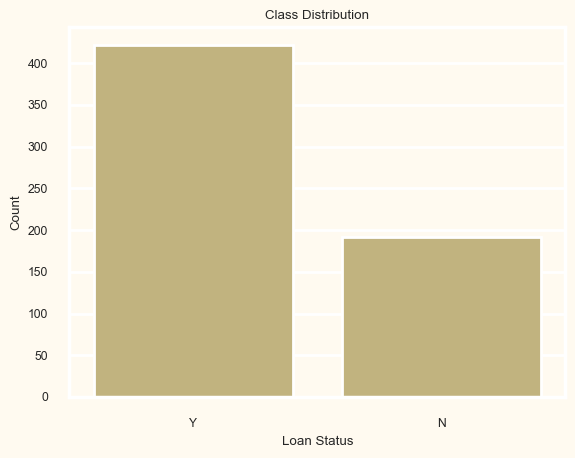

In [40]:
sns.countplot(x='Loan_Status', data=df, color='y')
df['Loan_Status'].value_counts()
plt.title('Class Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- The counts of the class distribution for the target variable indicate data imbalance, so we need to balance this by oversampling.

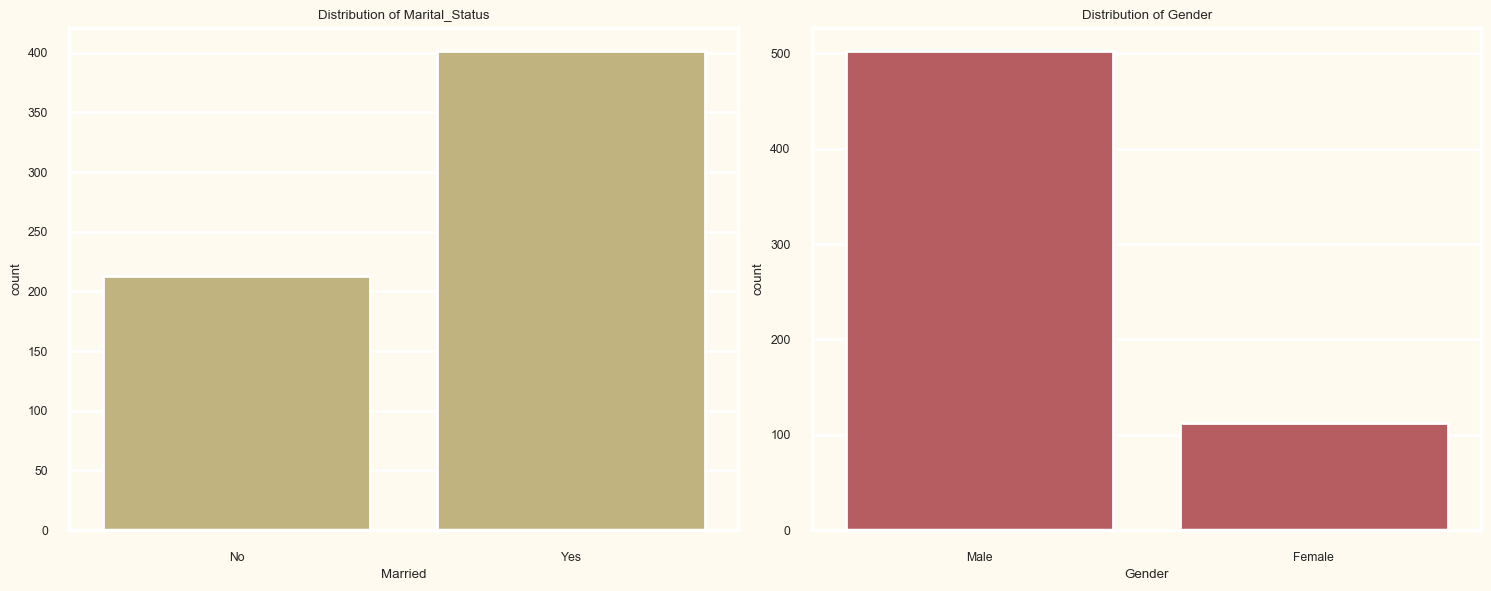

In [41]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Married'], color='y', ax=axs[0])
axs[0].set_title('Distribution of Marital_Status')
axs[0].set_xlabel('Married')

sns.countplot(x=df['Gender'], color='r', ax=axs[1])
axs[1].set_title('Distribution of Gender')
axs[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()

- The count plot indicates that a higher number of applicants are married compared to those who are single, and that there are significantly more male applicants than female applicants.

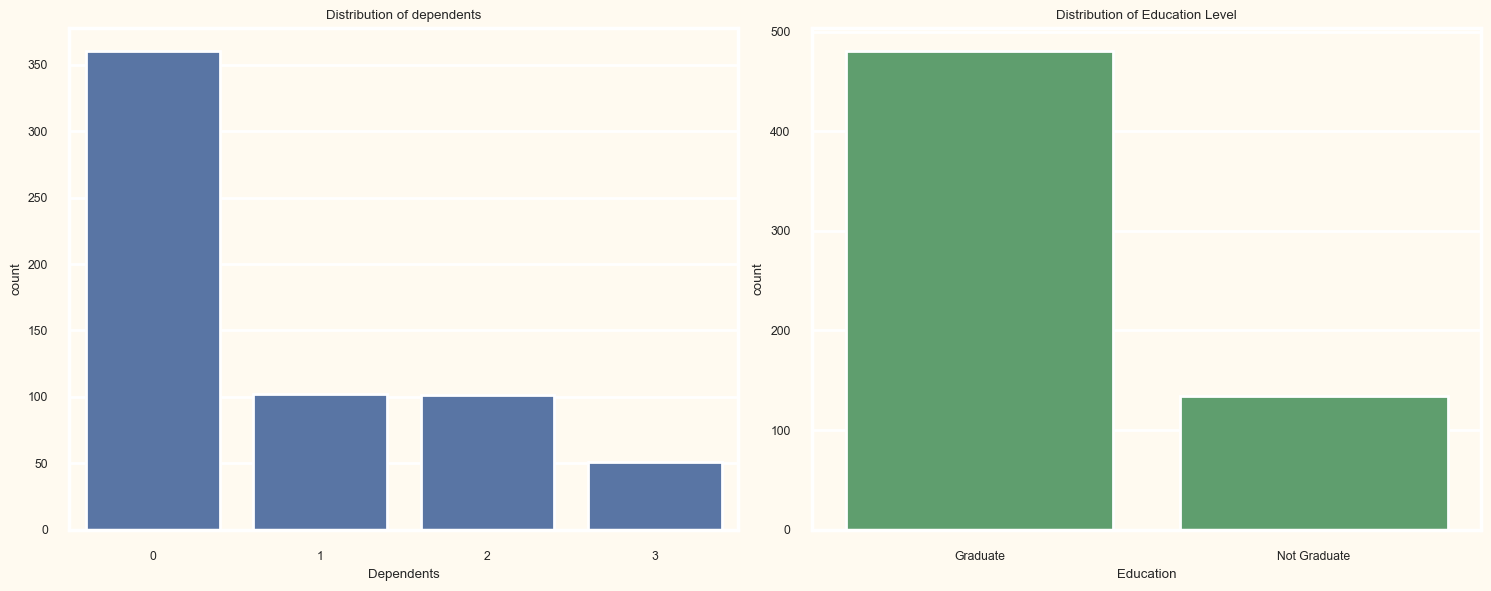

In [42]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Dependents'], color='b', ax=axs[0])
axs[0].set_title('Distribution of dependents')
axs[0].set_xlabel('Dependents')

sns.countplot(x=df['Education'], color='g', ax=axs[1])
axs[1].set_title('Distribution of Education Level')
axs[1].set_xlabel('Education')

plt.tight_layout()
plt.show()

- The count plot indicates that a higher number of applicants are Graduate as compared to those who are non graduate, and that there are significantly more number applicants have no dependents as compared to other.

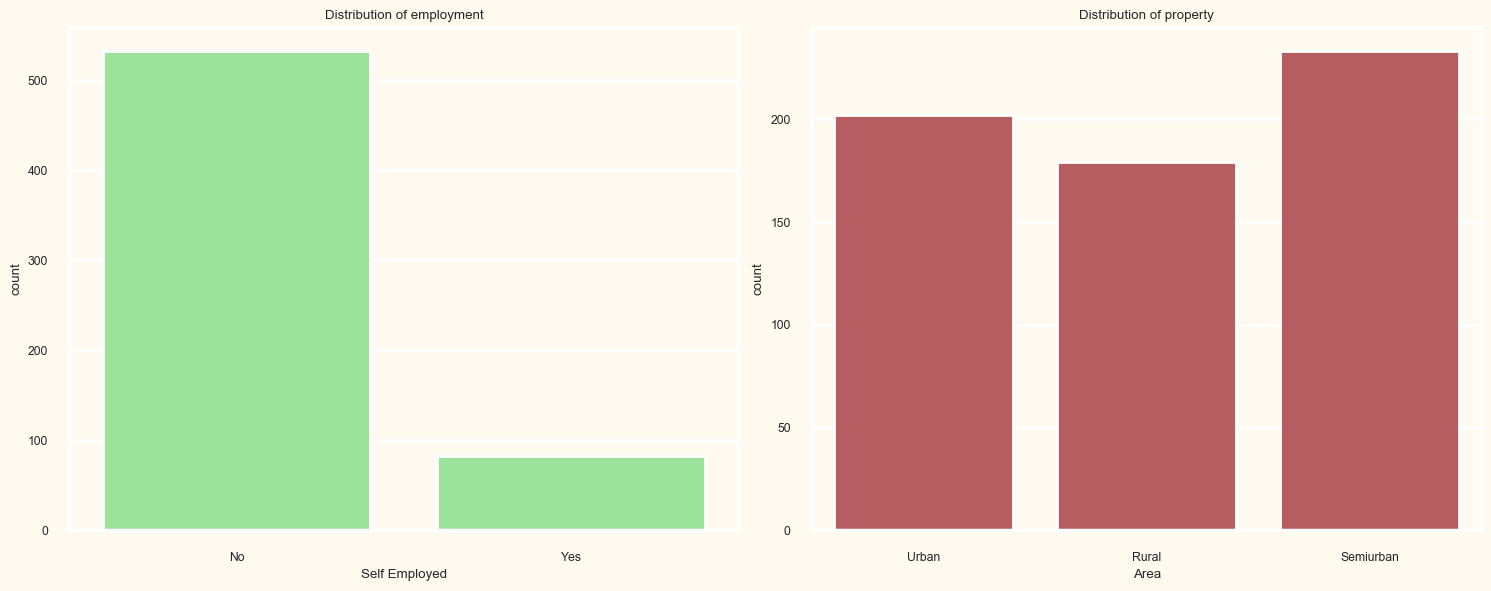

In [43]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Self_Employed'], color='lightgreen', ax=axs[0])
axs[0].set_title('Distribution of employment')
axs[0].set_xlabel('Self Employed')

sns.countplot(x=df['Property_Area'], color='r', ax=axs[1])
axs[1].set_title('Distribution of property')
axs[1].set_xlabel('Area')

plt.tight_layout()
plt.show()

- The count plot indicates that a higher number of applicants are not self employed as compared to those who are self employed, and that there are more number of applicants are based on semi urban area as compared to other areas.

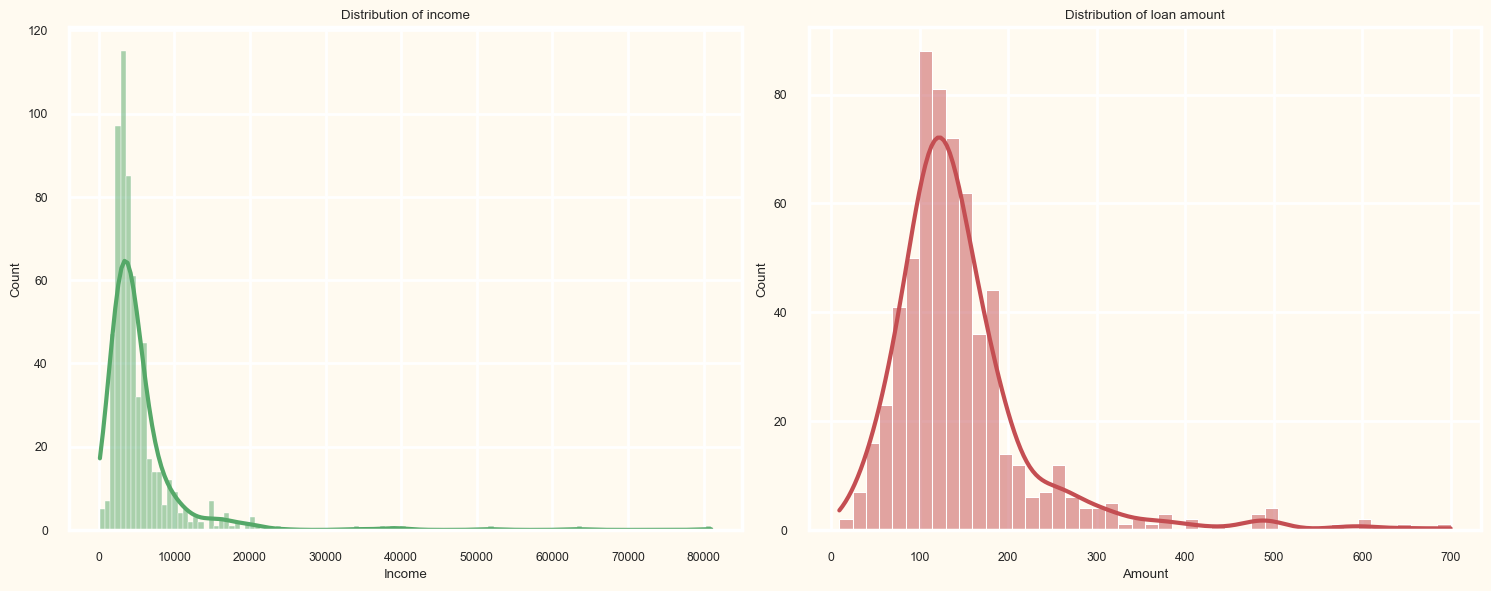

In [44]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(x=df['ApplicantIncome'], color='g', ax=axs[0], kde=True)
axs[0].set_title('Distribution of income')
axs[0].set_xlabel('Income')

sns.histplot(x=df['LoanAmount'], color='r', ax=axs[1], kde=True)
axs[1].set_title('Distribution of loan amount')
axs[1].set_xlabel('Amount')

plt.tight_layout()
plt.show()

- The histogram plot shows that a larger number of applicants have an income of less than or equal to 10,000, and there is a significant number of applicants with loan amounts between 100 and 200.

# Bi-variate Analysis

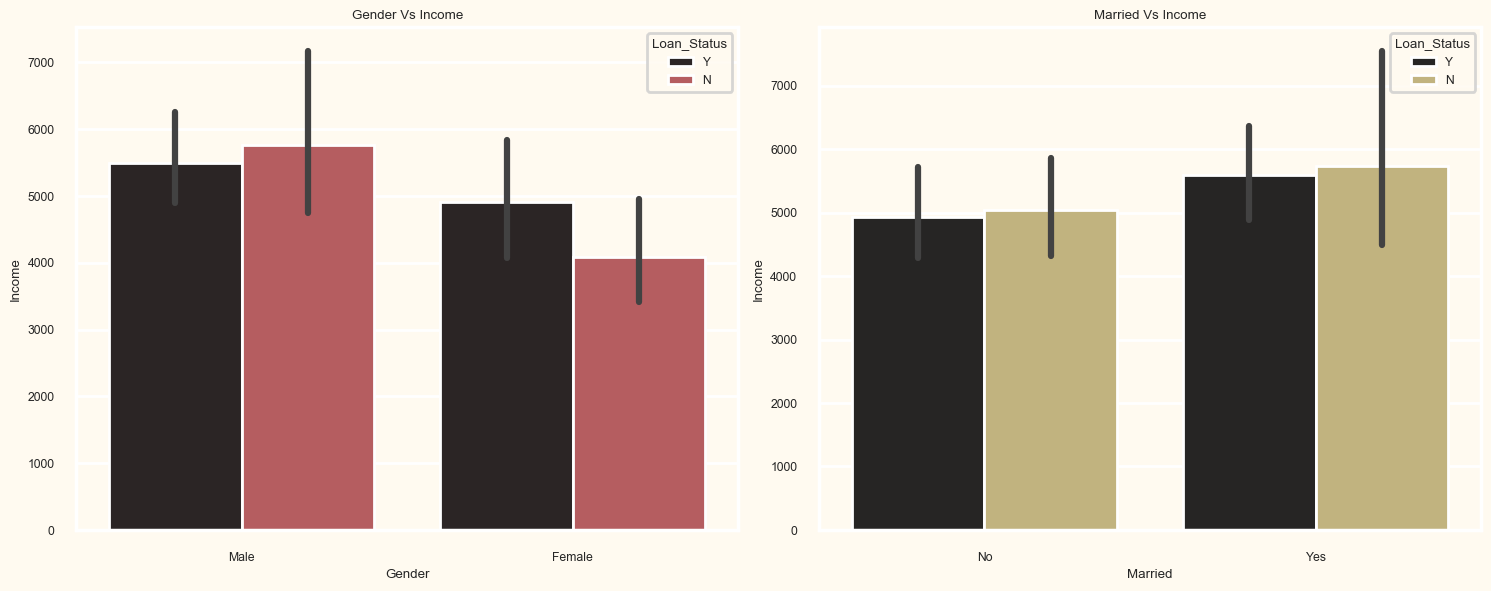

In [45]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=df['Gender'], y=df['ApplicantIncome'], color='r', hue=df['Loan_Status'], ax=axs[0])
axs[0].set_title('Gender Vs Income')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Income')

sns.barplot(x=df['Married'], y=df['ApplicantIncome'], color='y', hue=df['Loan_Status'],  ax=axs[1])
axs[1].set_title('Married Vs Income')
axs[1].set_xlabel('Married')
axs[1].set_ylabel('Income')

plt.tight_layout()
plt.show()

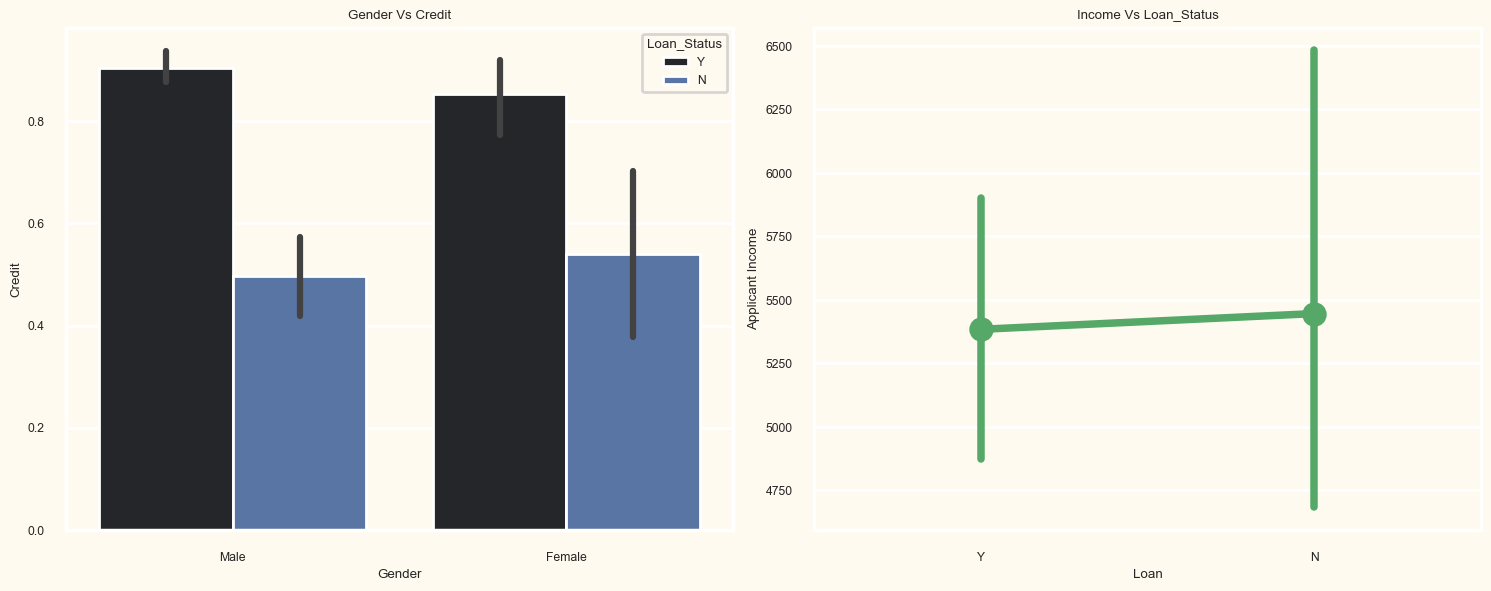

In [46]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=df['Gender'], y=df['Credit_History'], color='b', hue=df['Loan_Status'], ax=axs[0])
axs[0].set_title('Gender Vs Credit')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Credit')

sns.pointplot(x=df['Loan_Status'], y=df['ApplicantIncome'], color='g',   ax=axs[1])
axs[1].set_title('Income Vs Loan_Status')
axs[1].set_xlabel('Loan')
axs[1].set_ylabel('Applicant Income')

plt.tight_layout()
plt.show()

By observation,
 - In the right plot, the applicants income is significantly higher for non-approved loans as compared to those are approved.So we can conclude that, applicants income is not associated with loan approval.

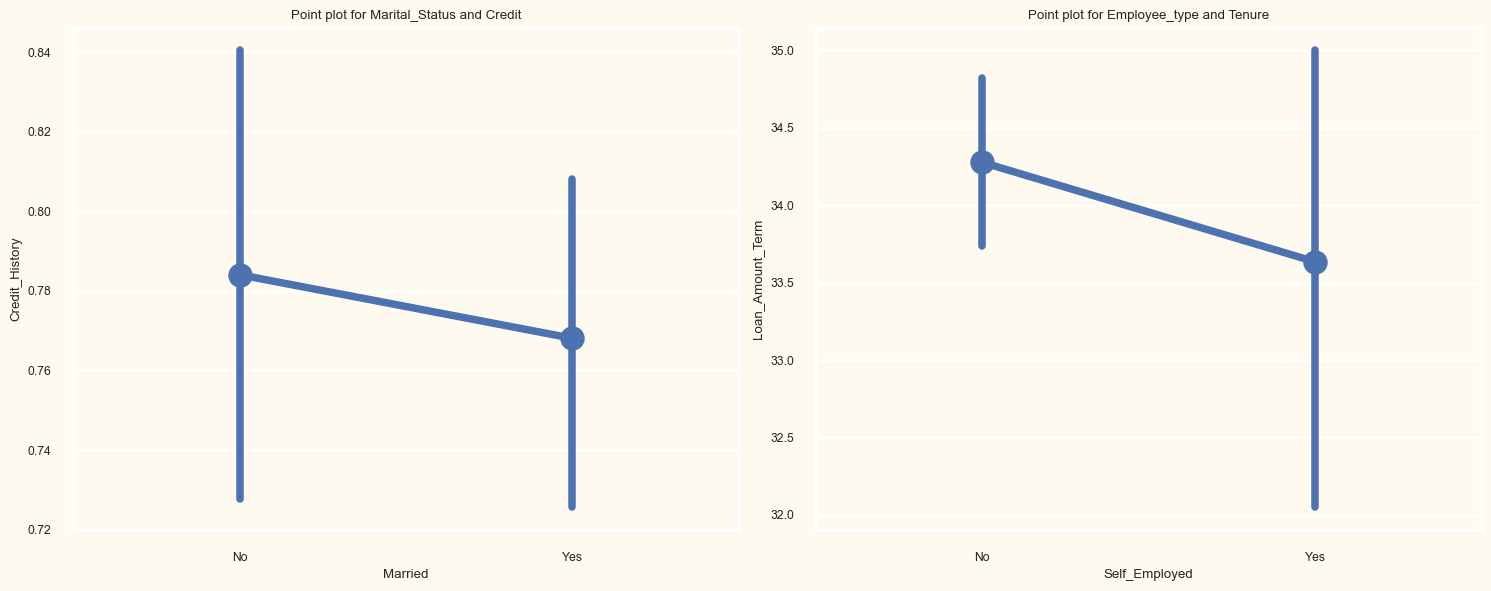

In [47]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.pointplot(x=df['Married'], y=df['Credit_History'],ax=axs[0]).set_title('Point plot for Marital_Status and Credit')
sns.pointplot(x=df['Self_Employed'], y=df['Loan_Amount_Term'], ax=axs[1]).set_title('Point plot for Employee_type and Tenure')
plt.tight_layout()
plt.show()

By observation,
- In the left plot,the point for the unmarried applicants is significantly higher than married applicants.So we can conclude that unmarried applicants tend to have better credit histories.
  - In the right plot, the point shows self-employed applicants generally have a shorter loan term as compared to non-self-employed applicants.So we can conclude that employment status influences loan term preferences.

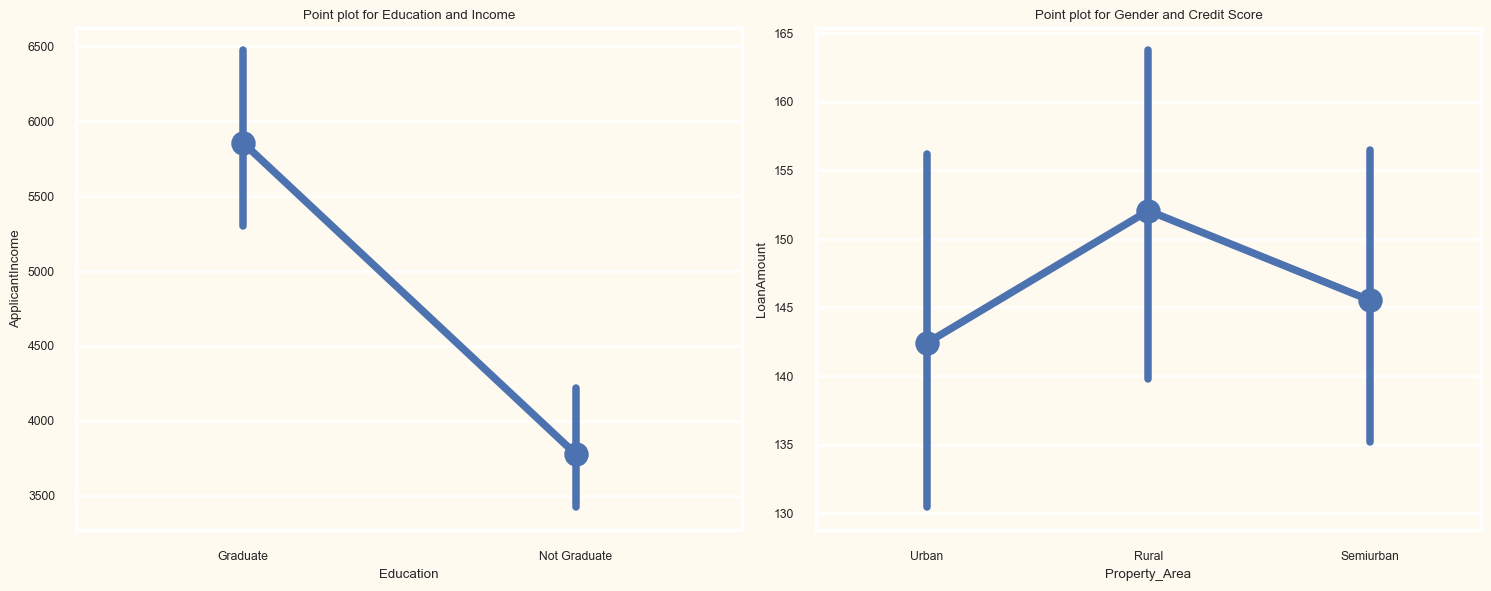

In [48]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.pointplot(x=df['Education'], y=df['ApplicantIncome'],ax=axs[0]).set_title('Point plot for Education and Income')
sns.pointplot(x=df['Property_Area'], y=df['LoanAmount'], ax=axs[1]).set_title('Point plot for Gender and Credit Score')
plt.tight_layout()
plt.show()

By observation,
- In the left plot, the point shows the higher level of education of an applicants have higher average income as compared to low level educated applicants.So we can conclude that,higher education is associated with increased earning potential.
  - In the right plot, the point shows Rural property areas have higher average loan amount as compared to Urban areas.So we can conclude that,borrowers in rural area tend to apply for larger amount loans, possibly due to higher property values.

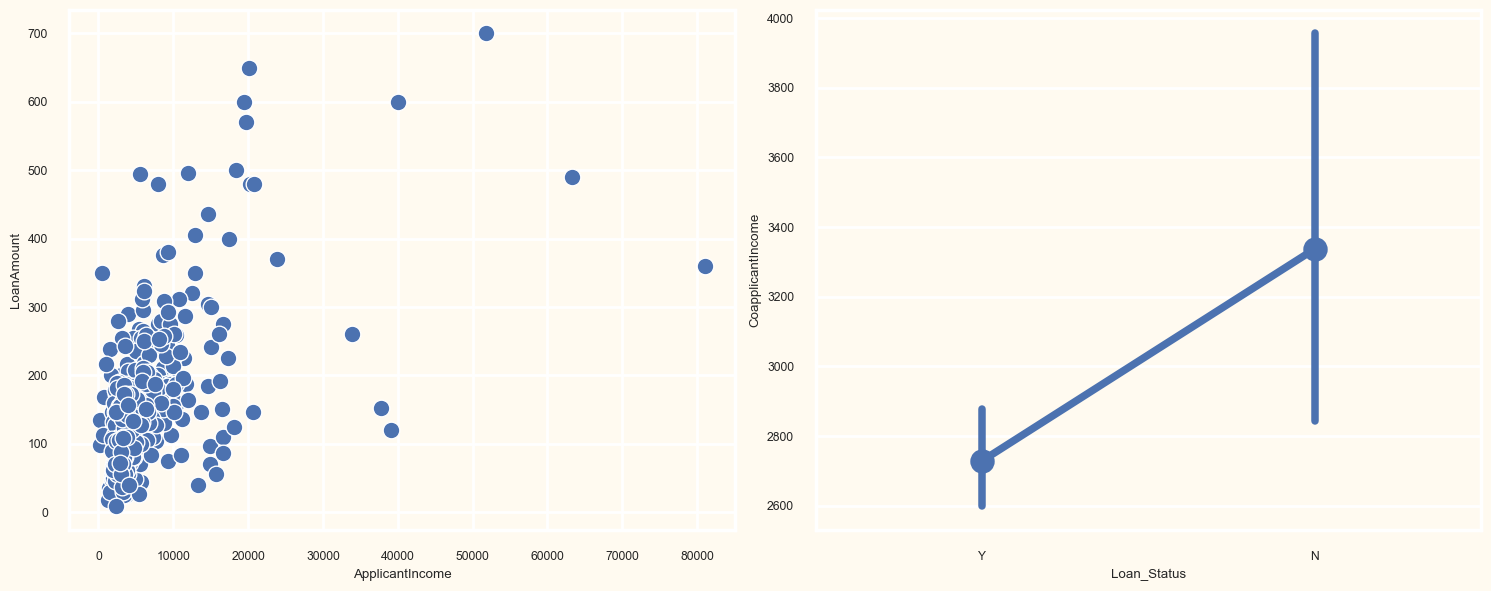

In [49]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'], ax=axs[0])
sns.pointplot(x=df['Loan_Status'], y=df['CoapplicantIncome'], ax=axs[1])
plt.tight_layout()
plt.show()

By observation,
- In the left plot, it shows a cluster form of applicant's income below 20000 and higher loan amount.It indicates an outlier are there.
   -  In the right plot, the co-applicants income is significantly higher for non-approved loans as compared to those are approved.So we can conclude that, co-applicants income is not associated with loan approval.

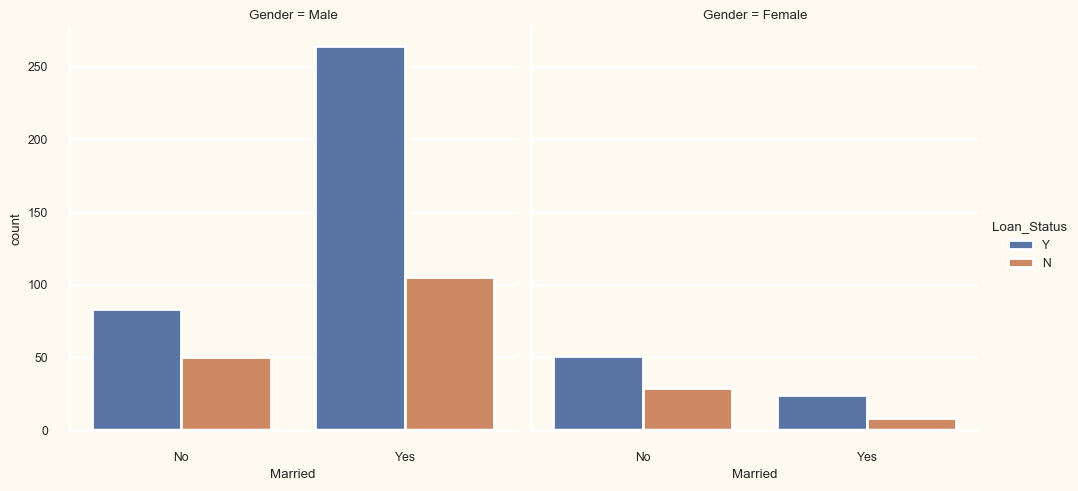

In [50]:
sns.catplot(x=df['Married'], col=df['Gender'],  hue=df['Loan_Status'], kind='count')

- This plot shows, married male applicants have higher loan approval rates as compared to unmarried applicants and married men are more likely to get approval for a loan.So we can conclude that, the marital status has an impact on loan approval.

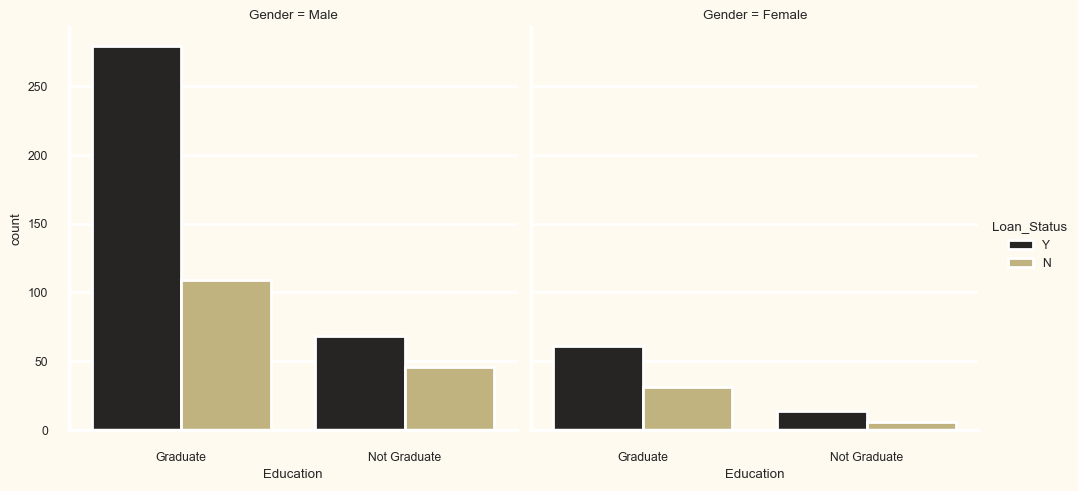

In [51]:
sns.catplot(x=df['Education'], col=df['Gender'], hue=df['Loan_Status'], kind='count', color='y')

- This plot shows, Graduate male applicants have higher loan approval rates as compared to under graduates male as well as graduate and under graduates female applicants and Highly educated male applicants are more likely to get approval for a loan.So we can conclude that, the education status has an impact on loan approval.

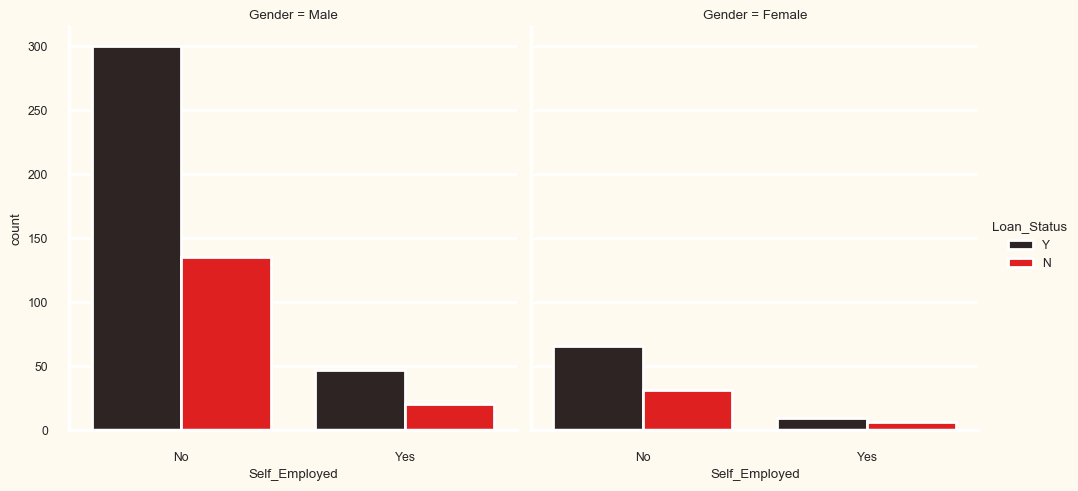

In [52]:
sns.catplot(x=df['Self_Employed'], col=df['Gender'], hue=df['Loan_Status'], kind='count', color='red')

- This plot shows, non self-employed male applicants have higher loan approval rates as compared to self-employed male as well as self-employed and non self-employed female applicants and salaried-employed male applicants are more likely to get approval for a loan.So we can conclude that, the employment status has an impact on loan approval.

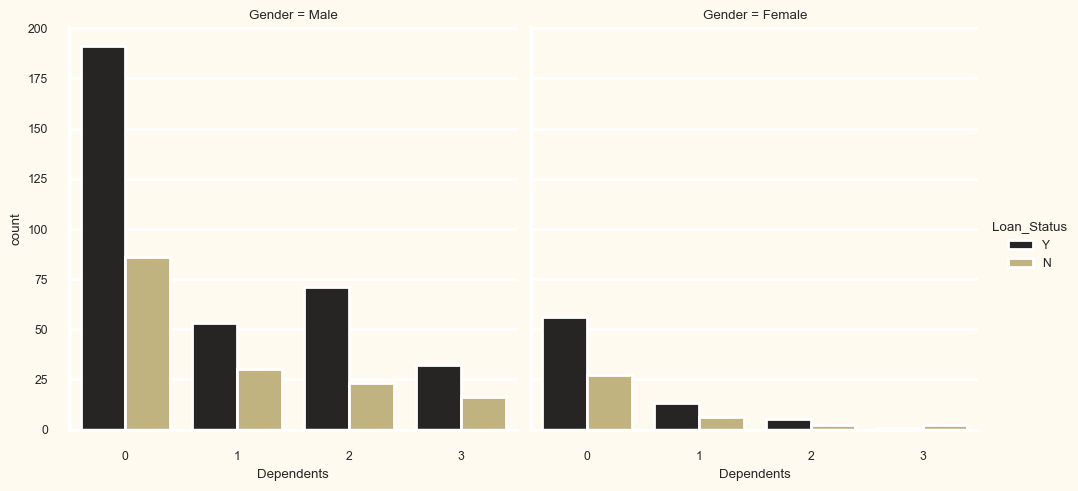

In [53]:
sns.catplot(x=df['Dependents'], col=df['Gender'], hue=df['Loan_Status'], kind='count', color='y')

- This plot shows the applicant with more dependents tend to have lower approval rates.
- Male applicants with no dependents are more likely to be approved for a loan..

# Multivariate Analysis

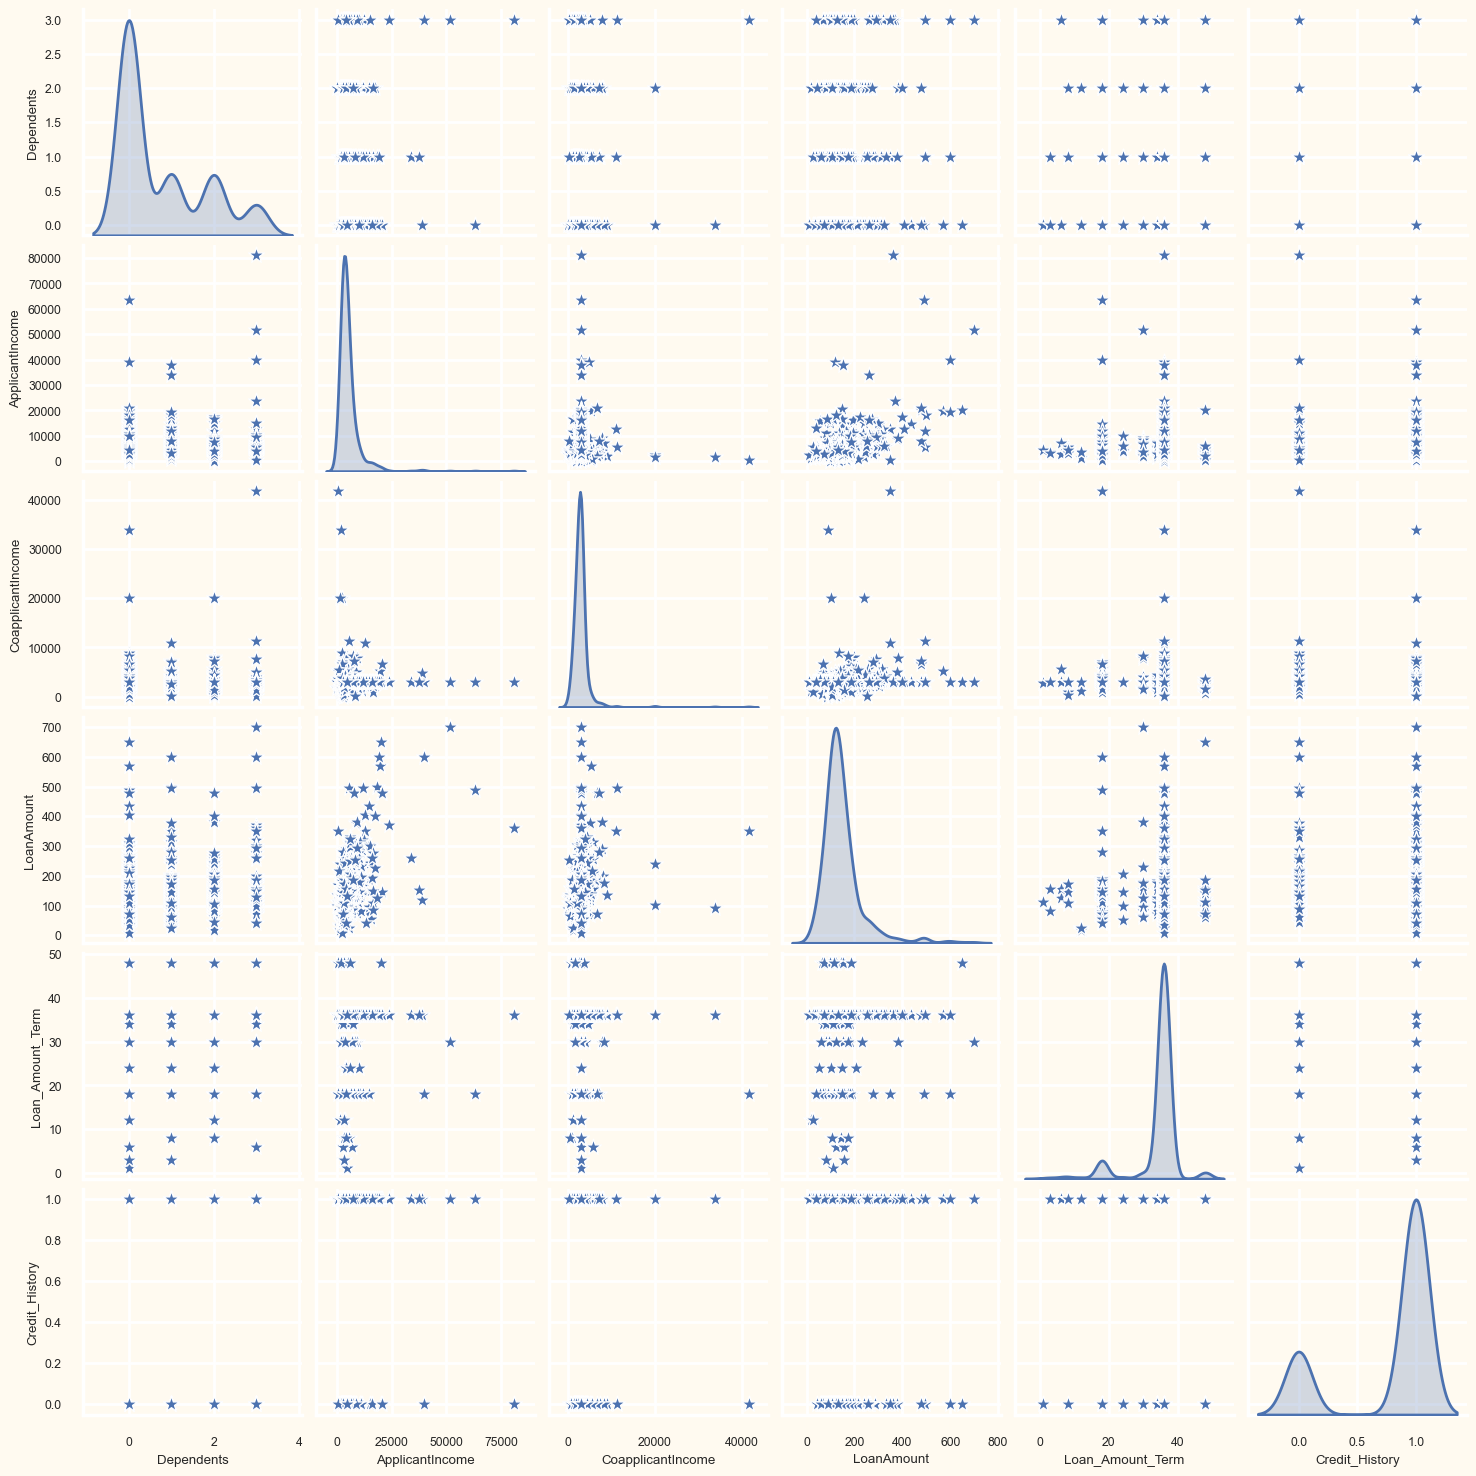

In [54]:
sns.pairplot(data=df, diag_kind='kde', markers='*')
plt.show()

# Encode categorical Feature

In [55]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
        
df.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,2919.190616,146,36,1,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.000000,128,36,1,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,2919.190616,66,36,1,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.000000,120,36,1,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,2919.190616,141,36,1,2.0,1.0


# Check Outlier

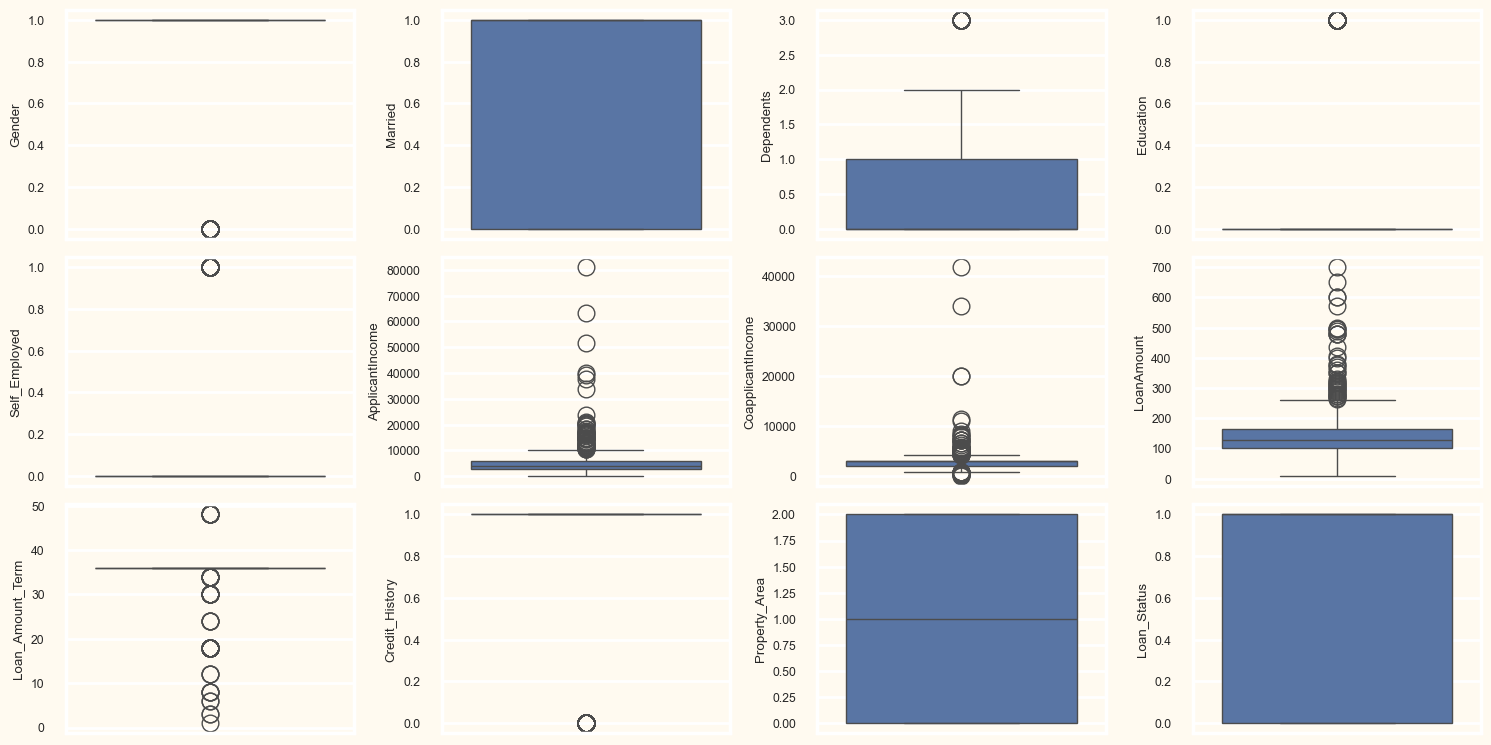

In [56]:
plt.figure(figsize=(15, 10))
p=1
for col in df.columns:
    if p < 16 :
        ax = plt.subplot(4,4,p)
        sns.boxplot(df[col])
    p +=1    
    
plt.tight_layout()

- By the observation of box-plot the continuous feature of dataset have too much extreme value which are not related for model prediction called outlier.
- No need any bother for oulier in categorical feature.Don't need remove outlier.
- Now we remove the outlier by using zscore.

In [57]:
from scipy.stats import zscore

from scipy.stats import zscore

z_score = zscore(df)

abs_z_score = np.abs(z_score)

filtering_entry = np.all(abs_z_score < 3, axis=1)

df1 = df[filtering_entry]

df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,2695.738363,136.032929,34.755633,0.772964,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1094.718484,56.190684,5.182527,0.419280,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,16.000000,9.000000,18.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,2033.000000,100.000000,36.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,2919.190616,128.000000,36.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2919.190616,160.000000,36.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,48.000000,1.000000,2.000000,1.000000


In [58]:
print('Old Dtaframe size : ',df.shape[0])
print('New Dtaframe size : ',df1.shape[0])

Old Dtaframe size :  614
New Dtaframe size :  577


In [59]:
print('Data Loss Percentage : ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage :  6.026058631921824


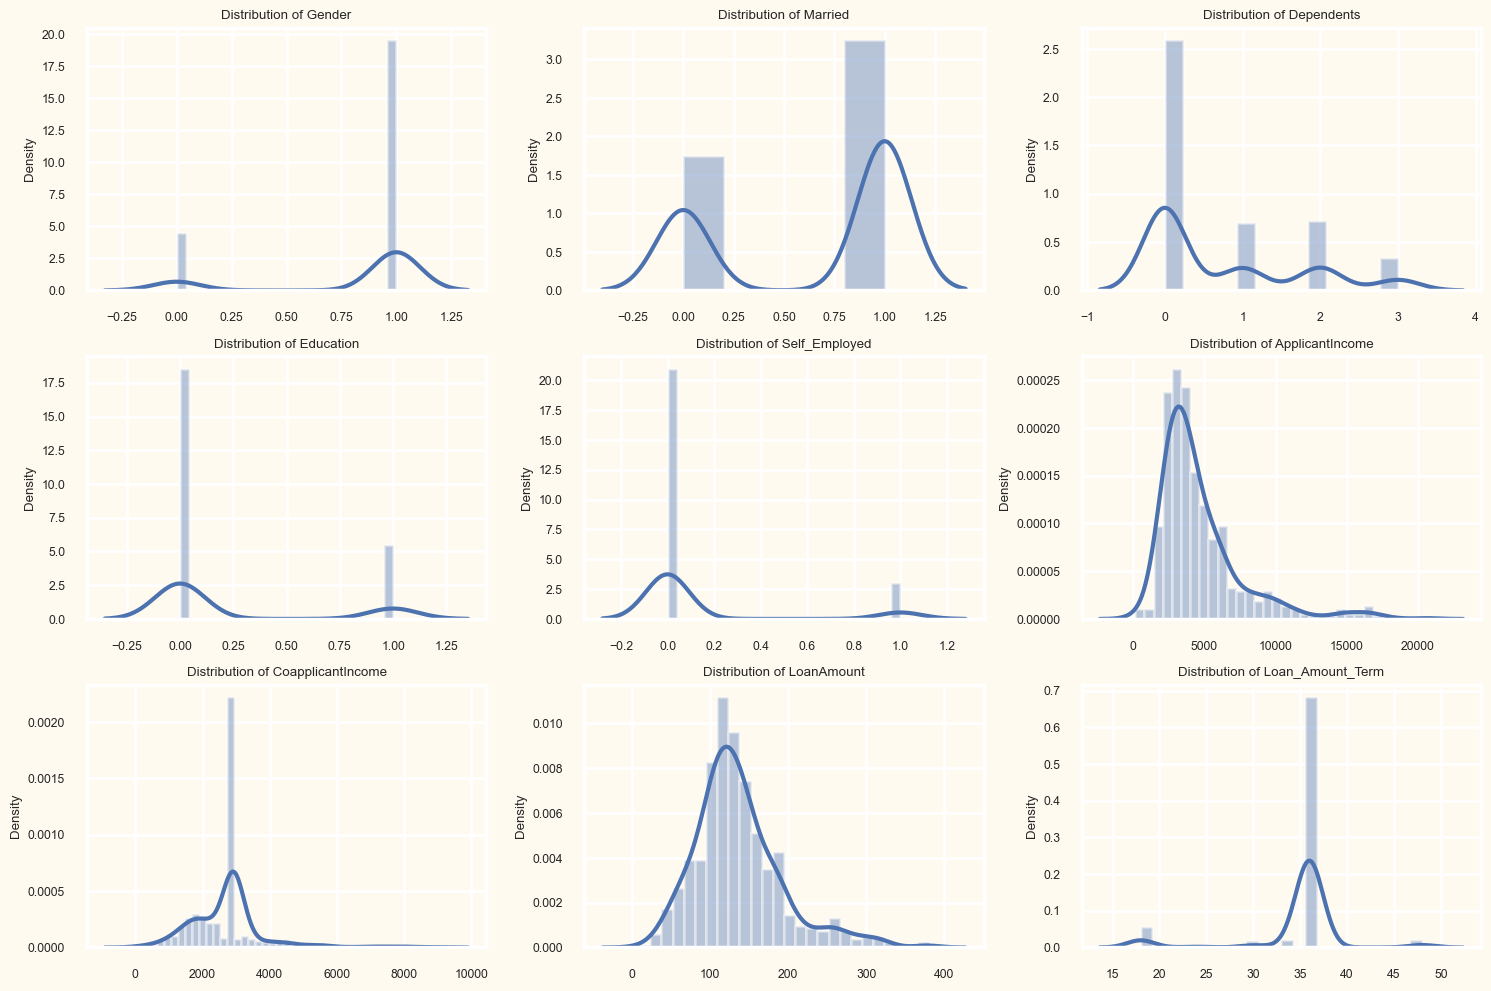

In [60]:
# Distribution Plot to check the normalization
plt.figure(figsize=(15,10))
p=1

for col in df1.columns:
    if p < 10:
        ax=plt.subplot(3,3,p)
        sns.distplot(x=df1[col])
        plt.title(f'Distribution of {col}')
    p+=1
plt.tight_layout()

- Distribution plot shows the continuous data to be right skewed.We need to remove skewness for normally distributed.

# Remove Skewness

In [61]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.628982
LoanAmount           1.114116
Loan_Amount_Term    -2.073517
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- The columns Gender,Married,Dependents,Education,Slef-employed,Applicant Income,Loan Amount,Loan_Amount_Term and Credit_History have skewness. So we remove skewness for continuous value, But for categorical value we no need to remove skewness.

- Do not remove skewness for categorical or binary variables.
    - Check skewness for continuous variables, and if significant, consider transformations to improve normality.

In [62]:
df1['Dependents'] = np.sqrt(df1['Dependents'])

In [63]:
df1['ApplicantIncome'] = np.log(df1['ApplicantIncome'])

In [64]:
df1['CoapplicantIncome'] = np.sqrt(df1['CoapplicantIncome'])

In [65]:
df1['LoanAmount'] = np.cbrt(df1['LoanAmount'])

In [66]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.093776
LoanAmount           0.017890
Loan_Amount_Term    -2.073517
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Correlation Analysis

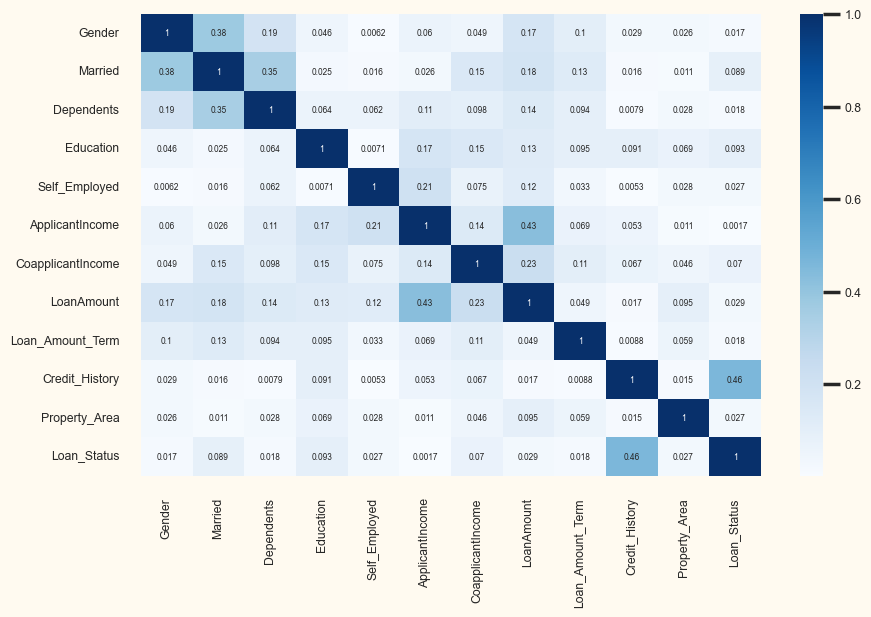

In [67]:
df_corr = df1.corr().abs()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 6},cmap='Blues')
plt.show()

In [68]:
X = df1.drop(columns=['Loan_Status'])
y = df1['Loan_Status']

# Check Imbalance

In [69]:
# balance the dataset
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(X,y)

# To check Multicolinearity using VIF method

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df2 = pd.DataFrame(d)

df2

,Feature,VIF
0,Gender,6.917511
1,Married,3.843284
2,Dependents,1.953587
3,Education,1.407162
4,Self_Employed,1.222467
5,ApplicantIncome,127.599971
6,CoapplicantIncome,30.383879
7,LoanAmount,80.042027
8,Loan_Amount_Term,39.022462
9,Credit_History,3.002879


In [71]:
x.drop('ApplicantIncome', axis=1, inplace=True)

In [72]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df2 = pd.DataFrame(d)

df2

,Feature,VIF
0,Gender,6.844937
1,Married,3.840770
2,Dependents,1.926573
3,Education,1.375504
4,Self_Employed,1.198782
5,CoapplicantIncome,26.223385
6,LoanAmount,53.401765
7,Loan_Amount_Term,29.260041
8,Credit_History,2.870033
9,Property_Area,2.638743


In [73]:
x.drop('LoanAmount', axis=1, inplace=True)

In [74]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df2 = pd.DataFrame(d)

df2

,Feature,VIF
0,Gender,6.523616
1,Married,3.647680
2,Dependents,1.910633
3,Education,1.374678
4,Self_Employed,1.176808
5,CoapplicantIncome,17.352265
6,Loan_Amount_Term,18.656902
7,Credit_History,2.869008
8,Property_Area,2.638472


In [75]:
x.drop('Loan_Amount_Term', axis=1, inplace=True)

In [76]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df2 = pd.DataFrame(d)

df2

,Feature,VIF
0,Gender,6.402079
1,Married,3.610372
2,Dependents,1.910603
3,Education,1.366066
4,Self_Employed,1.175948
5,CoapplicantIncome,7.268645
6,Credit_History,2.673230
7,Property_Area,2.592530


- Now we see that most of the features VIF score is below 10.then it suggest that there is no multicolinearity present.

# Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Find Best Random State

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [79]:
maxAccu = 0
maxRS = 0

for i in range(1,150):
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum accuracy is ', maxAccu, 'on random state ', maxRS)        

Maximum accuracy is  0.8442211055276382 on random state  80


# Model Building

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=maxRS)

In [81]:
def metrics_score(clf, x_train, y_train, x_test, y_test):
    train_accu= accuracy_score(clf.predict(x_train),y_train)*100
    y_pred = clf.predict(x_test)
    test_accu= accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test,y_pred)
    c_report = classification_report(y_test,y_pred)
    return train_accu,test_accu,cm,c_report

In [82]:
def cross_val(model, x_train, y_train):
    k = KFold(n_splits=5)
    score = cross_val_score(model, x_train, y_train, cv=k)
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------")
    difference = (accuracy_score(y_test,y_pred) - score.mean())
    return difference

In [83]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Extra Trees Classifier', ExtraTreesClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier())
]

# Model Evaluation

In [84]:
for name, clf in models:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    train_accu, test_accu, cm, c_report = metrics_score(clf, x_train, y_train, x_test, y_test)
    
    print(f"{name} Metrics:")
    print('---------------------------------------------------')
    print(f"Train Accuracy: {train_accu:.2f}%")
    print(f"Test Accuracy: {test_accu:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", c_report)
    
    difference = cross_val(clf, x_train, y_train)
    print(f"Difference between test accuracy and average cross-validation score: {difference:.4f}")
    print("="*50)

Logistic Regression Metrics:
---------------------------------------------------
Train Accuracy: 73.03%
Test Accuracy: 78.39%
Confusion Matrix:
 [[77 31]
 [12 79]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.71      0.78       108
         1.0       0.72      0.87      0.79        91

    accuracy                           0.78       199
   macro avg       0.79      0.79      0.78       199
weighted avg       0.80      0.78      0.78       199

Cross Validation Score : [0.69166667 0.73333333 0.69747899 0.75630252 0.72268908]
Average Cross Validation Score : 0.7202941176470589

------------------
Difference between test accuracy and average cross-validation score: 0.0636
Random Forest Classifier Metrics:
---------------------------------------------------
Train Accuracy: 93.63%
Test Accuracy: 83.92%
Confusion Matrix:
 [[91 17]
 [15 76]]
Classification Report:
               precision    recall  f1-score   support

       

- the Gradient Boosting Classifier stands out as the best model for your dataset.
- Here are the reasons why:
    - Higher Average Cross-Validation Score and Test Accuracy and Least difference between test accuracy and average cross-validation in Gradient Boosting Classifier from other model.This indicates that Gradient Boosting generally performs well across different subsets of data and this indicates a good balance between precision and recall, making it reliable for identifying positive cases.
        - Gradient Boosting has a difference of 0.0754, which is better than other models, indicating it generalizes well and is less likely to be overfitting.

# Model tuning

In [85]:
parameter = {
    'loss' : ['log_loss', 'exponential'],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [86]:
gb = GridSearchCV(GradientBoostingClassifier(), param_grid=parameter, cv=5, scoring='accuracy')
gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [87]:
gb.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'exponential',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [88]:
final_model = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.05, loss= 'exponential', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
print('Testing Accuracy : {:.2f} %'.format(round(accuracy_score(y_test, pred) * 100, 2)))
print('-----------------------------------------------')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Testing Accuracy : 82.91 %
-----------------------------------------------
[[88 20]
 [14 77]]


              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84       108
         1.0       0.79      0.85      0.82        91

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



# Save the Best Model

In [89]:
import joblib
joblib.dump(final_model,'Loan Application Status Prediction.pkl')

['Loan Application Status Prediction.pkl']